In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [2]:
print(os.getcwd())
os.chdir('/Users/liuyang/Desktop/Springboard_Capstone/data') 
print(os.getcwd())

/Users/liuyang/Desktop/Springboard_Capstone/notebooks
/Users/liuyang/Desktop/Springboard_Capstone/data


In [3]:
%run func.py

In [4]:
df = pd.read_csv('EDA_data.csv')

In [5]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,0~5 years,less than 1000,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,11~20 years,less than 100,Funded Startup,1,69,0
2,46,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,6~10 years,less than 100,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,11~20 years,less than 100,Pvt Ltd,1,26,0
4,21751,city_100,0.887,Male,No relevent experience,no_enrollment,Masters,STEM,6~10 years,less than 100,Pvt Ltd,2,88,1


In [6]:
df.shape

(18359, 14)

In [7]:
# Check the value counts and percentage of the target value. 
# 0 represents enrollees who are not open to new job, 1 represents who are open to new job.
var_pct(df['target'])

,number,percentage
0,15934,86.79
1,2425,13.21


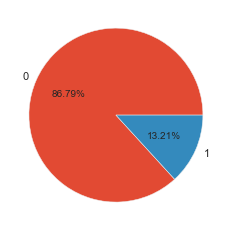

In [8]:
# Visualizing with pie plot.
plt.style.use('ggplot')
target_df = var_pct(df['target'])
plt.pie(target_df.number, labels=target_df.index, autopct='%.2f%%')
plt.show()

In [9]:
def var_target_df(data,col,n):
    col_top_n = pd.crosstab(df[col],df['target']).reset_index().sort_values(1,ascending=False).reset_index(drop=True)[0:n]
    col_top_n['pct'] = round(col_top_n[1]/(col_top_n[0]+col_top_n[1])*100,2)
    return col_top_n.sort_values('pct',ascending=False).set_index(col,drop=True)
    

In [10]:
var_target_df(df,'city',10)

target,0,1,pct
city,,,
city_21,1219,453,27.09
city_11,114,36,24.00
city_100,227,44,16.24
city_73,226,38,14.39
city_103,3795,563,12.92
city_160,729,98,11.85
city_67,406,49,10.77
city_16,1500,154,9.31
city_114,1336,136,9.24


In [11]:
city_targetTop10 = var_target_df(df,'city',10)

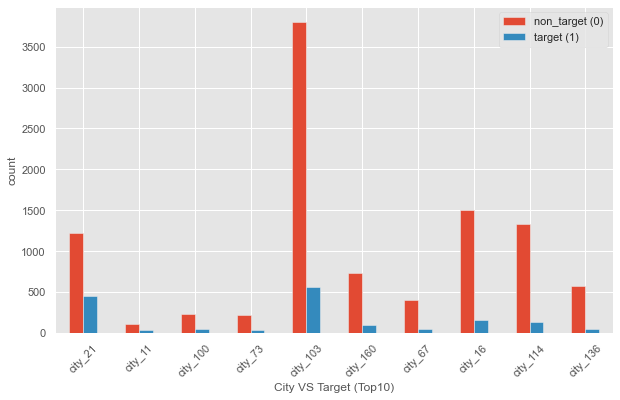

In [12]:
city_targetTop10.drop('pct',axis=1).plot(kind='bar',figsize=(10,6),rot=45)
plt.xlabel('City VS Target (Top10)')
plt.ylabel('count')
plt.legend(['non_target (0)','target (1)'])
plt.show()

In [13]:
def create_hist(data,col,n):
    mean = df[col].describe()['mean']
    per25 = df[col].describe()['25%']
    per75 = df[col].describe()['75%']
    min = df[col].describe()['min']
    max = df[col].describe()['max']
    df[col].hist(bins=n,figsize=(10,6))
    plt.axvline(mean,color='b')
    plt.axvline(per25,color='b',linestyle='--')
    plt.axvline(per75,color='b',linestyle='--')
    plt.axvline(min,color='b',linestyle='-.')
    plt.axvline(max,color='b',linestyle='-.')
    plt.show()

In [14]:
# plt.hist(df['city_development_index'],bins=10,stacked=True,density=True)
# plt.show()

In [15]:
df['city_development_index'].describe()

count    18359.000000
mean         0.847140
std          0.110189
min          0.448000
25%          0.796000
50%          0.910000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

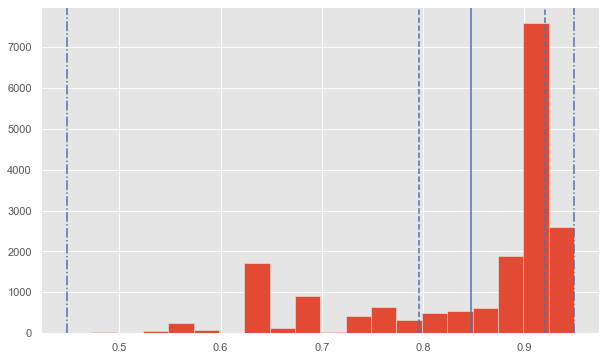

In [16]:
create_hist(df,'city_development_index',20)

In [17]:
var_target_df(df,'city_development_index',10)

target,0,1,pct
city_development_index,,,
0.624,1219,453,27.09
0.887,227,44,16.24
0.698,554,101,15.42
0.754,226,38,14.39
0.920,4524,661,12.75
0.855,406,49,10.77
0.910,1500,154,9.31
0.926,1336,136,9.24
0.939,496,48,8.82


In [18]:
city_devidx_targetTop10=var_target_df(df,'city_development_index',10)

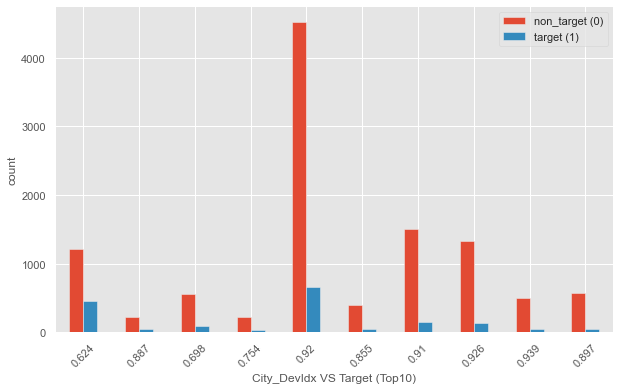

In [19]:
city_devidx_targetTop10.drop('pct',axis=1).plot(kind='bar',figsize=(10,6),rot=45)
plt.xlabel('City_DevIdx VS Target (Top10)')
plt.ylabel('count')
plt.legend(['non_target (0)','target (1)'])
plt.show()

In [20]:
var_target_df(df,'gender',3)

target,0,1,pct
gender,,,
Other,160,29,15.34
Female,1009,179,15.07
Male,14765,2217,13.05


In [21]:
gender_target = var_target_df(df,'gender',3)

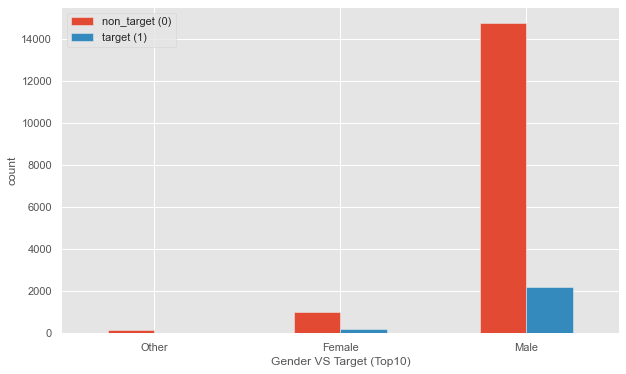

In [22]:
gender_target.drop('pct',axis=1).plot(kind='bar',figsize=(10,6),rot=360)
plt.xlabel('Gender VS Target (Top10)')
plt.ylabel('count')
plt.legend(['non_target (0)','target (1)'])
plt.show()

In [23]:
var_target_df(df,'relevent_experience',2)

target,0,1,pct
relevent_experience,,,
No relevent experience,3932,831,17.45
Has relevent experience,12002,1594,11.72


In [24]:
relevent_experience_target = var_target_df(df,'relevent_experience',2)

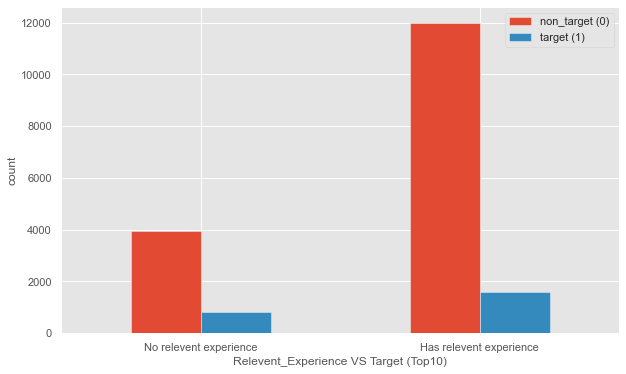

In [25]:
relevent_experience_target.drop('pct',axis=1).plot(kind='bar',figsize=(10,6),rot=360)
plt.xlabel('Relevent_Experience VS Target (Top10)')
plt.ylabel('count')
plt.legend(['non_target (0)','target (1)'])
plt.show()

In [26]:
var_target_df(df,'enrolled_university',3)

target,0,1,pct
enrolled_university,,,
Full time course,2580,607,19.05
Part time course,997,174,14.86
no_enrollment,12357,1644,11.74


In [27]:
uniEnroll_target = var_target_df(df,'enrolled_university',3)

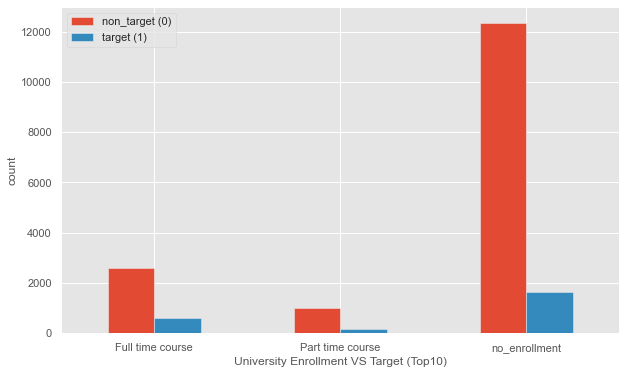

In [28]:
uniEnroll_target.drop('pct',axis=1).plot(kind='bar',figsize=(10,6),rot=360)
plt.xlabel('University Enrollment VS Target (Top10)')
plt.ylabel('count')
plt.legend(['non_target (0)','target (1)'])
plt.show()

In [29]:
var_target_df(df,'education_level',5)

target,0,1,pct
education_level,,,
Graduate,9633,1593,14.19
Masters,3806,513,11.88
High School,1791,241,11.86
Phd,406,53,11.55
Primary School,298,25,7.74


In [30]:
Edulevel_target = var_target_df(df,'education_level',5)

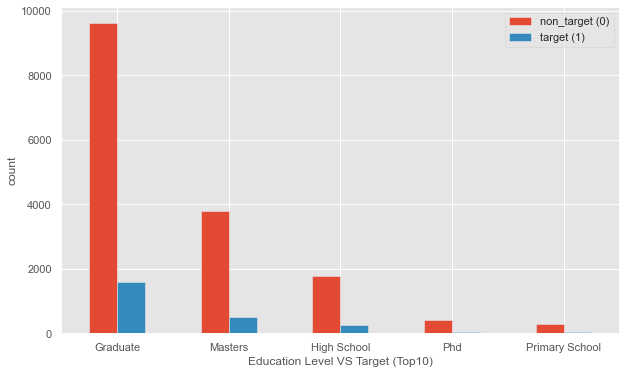

In [31]:
Edulevel_target.drop('pct',axis=1).plot(kind='bar',figsize=(10,6),rot=360)
plt.xlabel('Education Level VS Target (Top10)')
plt.ylabel('count')
plt.legend(['non_target (0)','target (1)'])
plt.show()

In [32]:
var_target_df(df,'major_discipline',6)

target,0,1,pct
major_discipline,,,
Humanities,595,93,13.52
STEM,14365,2211,13.34
Business Degree,268,39,12.70
Other,306,37,10.79
Arts,214,25,10.46
No Major,186,20,9.71


In [33]:
major_target = var_target_df(df,'major_discipline',6)

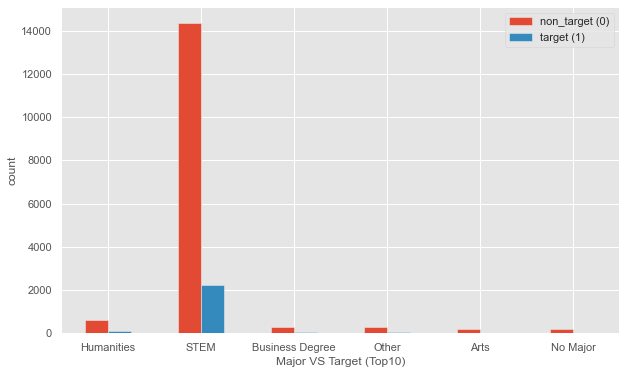

In [34]:
major_target.drop('pct',axis=1).plot(kind='bar',figsize=(10,6),rot=360)
plt.xlabel('Major VS Target (Top10)')
plt.ylabel('count')
plt.legend(['non_target (0)','target (1)'])
plt.show()

In [35]:
var_target_df(df,'experience',4)

target,0,1,pct
experience,,,
0~5 years,4612,966,17.32
6~10 years,4160,616,12.90
11~20 years,4008,501,11.11
> 20 years,3154,342,9.78


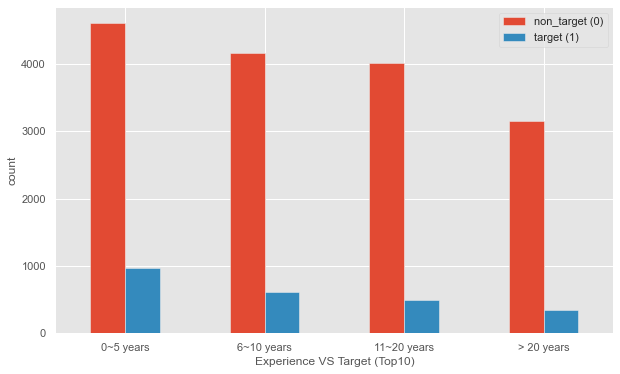

In [36]:
experience_target = var_target_df(df,'experience',4)
experience_target.drop('pct',axis=1).plot(kind='bar',figsize=(10,6),rot=360)
plt.xlabel('Experience VS Target (Top10)')
plt.ylabel('count')
plt.legend(['non_target (0)','target (1)'])
plt.show()

In [37]:
var_target_df(df,'company_size',3)

target,0,1,pct
company_size,,,
less than 100,9159,1566,14.60
1000 +,3560,474,11.75
less than 1000,3215,385,10.69


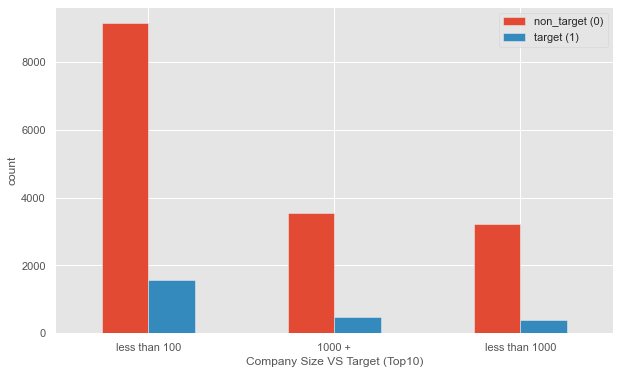

In [38]:
companySize_target = var_target_df(df,'company_size',3)
companySize_target.drop('pct',axis=1).plot(kind='bar',figsize=(10,6),rot=360)
plt.xlabel('Company Size VS Target (Top10)')
plt.ylabel('count')
plt.legend(['non_target (0)','target (1)'])
plt.show()

In [39]:
var_target_df(df,'company_type',6)

target,0,1,pct
company_type,,,
Other,100,19,15.97
Public Sector,844,152,15.26
Pvt Ltd,13075,2015,13.35
NGO,465,69,12.92
Early Stage Startup,508,74,12.71
Funded Startup,942,96,9.25


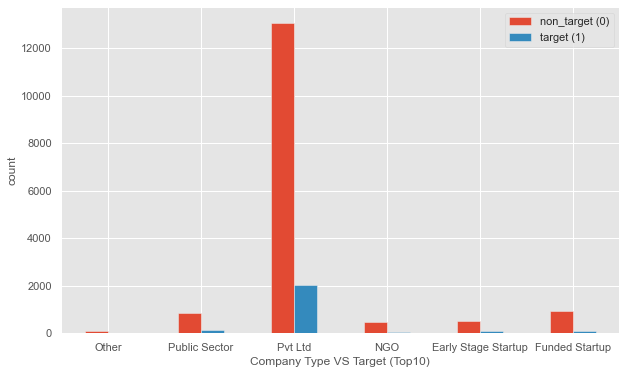

In [40]:
companyType_target= var_target_df(df,'company_type',6)
companyType_target.drop('pct',axis=1).plot(kind='bar',figsize=(10,6),rot=360)
plt.xlabel('Company Type VS Target (Top10)')
plt.ylabel('count')
plt.legend(['non_target (0)','target (1)'])
plt.show()

In [41]:
var_target_df(df,'last_new_job',6)

target,0,1,pct
last_new_job,,,
never,1876,310,14.18
4,891,147,14.16
2,2446,389,13.72
1,6846,1088,13.71
3,897,130,12.66
>4,2978,361,10.81


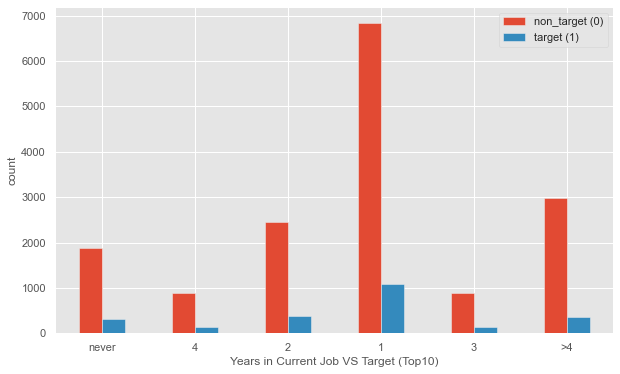

In [42]:
lastNewJob_target=var_target_df(df,'last_new_job',6)
lastNewJob_target.drop('pct',axis=1).plot(kind='bar',figsize=(10,6),rot=360)
plt.xlabel('Years in Current Job VS Target (Top10)')
plt.ylabel('count')
plt.legend(['non_target (0)','target (1)'])
plt.show()

In [43]:
df['training_hours'].describe()

count    18359.000000
mean        65.899014
std         60.885300
min          1.000000
25%         23.000000
50%         47.000000
75%         89.000000
max        336.000000
Name: training_hours, dtype: float64

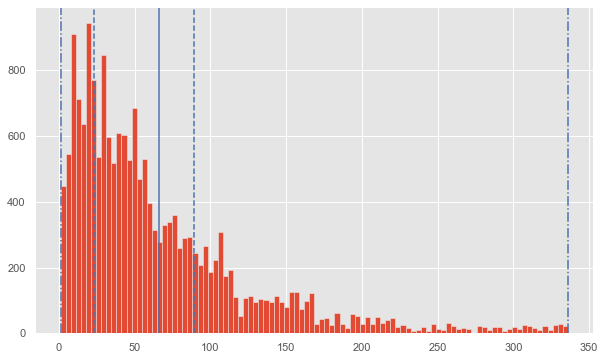

In [44]:
create_hist(df,'training_hours',100)

In [45]:
# df_normalized=(df.drop('city',axis=1)-df.drop('city',axis=1).mean())/df.drop('city',axis=1).std()
# cov_matrix=df_normalized.cov()
# cov_matrix

In [46]:
df.groupby('target')['training_hours'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,15934.0,66.011485,60.908040,1.0,23.0,47.0,89.0,336.0
1,2425.0,65.160000,60.743027,1.0,23.0,47.0,87.0,336.0


#### Looks like the mean of training_hour is the same between target and nontarget enrollee

In [47]:
df['permutation']=np.random.permutation(df.training_hours)

In [48]:
df.groupby('target')['permutation'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,15934.0,65.889356,60.934287,1.0,23.0,47.0,89.0,336.0
1,2425.0,65.962474,60.574905,1.0,23.0,47.0,89.0,334.0


In [49]:
difference = list()

# Now make a for loop that does the following 10,000 times:
# 1. makes a permutation of the 'training_hours' 
# 2. calculates the difference in the mean training_hours for target enrollee and nontarget enrollee 
for i in range(10000):
    permutation = np.random.permutation(df['training_hours'])
    difference.append(np.mean(permutation[df.target == 0]) - np.mean(permutation[df.target == 1]))

(array([  17.,  163.,  644., 1703., 2803., 2574., 1471.,  522.,   87.,
          16.]),
 array([-4.67807823, -3.71893327, -2.75978831, -1.80064335, -0.84149839,
         0.11764657,  1.07679153,  2.03593649,  2.99508145,  3.95422641,
         4.91337137]),
 <a list of 10 Patch objects>)

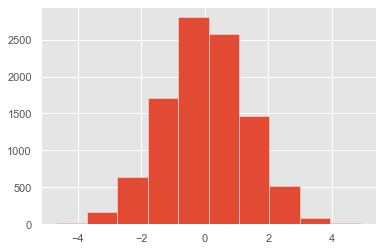

In [50]:
plt.hist(difference)

In [51]:
# mean difference between target enrollee and nontarget enrollee
ob_di = abs(df.groupby('target')['training_hours'].describe()['mean'].diff()[1])
ob_di

0.8514848751098327

In [52]:
difference=np.array(difference)

In [53]:
p_val= (np.sum(difference>=ob_di)+np.sum(difference<=-ob_di))/len(difference)

In [54]:
p_val

0.5176

#### p value is larger than 0.05 therefore fail to reject null hypothesis. We can say there is no difference in training_hours between target enrollee and nontarget enrollee

#### Please ignore the 3 cells as below

In [55]:
# city_target = df.groupby('city')['target'].sum().nlargest(10)
# city_target = pd.DataFrame(city_target).reset_index()
# city_list = city_target.city.tolist()

# city_total = dict()
# for i in df.city:
#     if i in city_list:
#         city_total[i] = df.loc[df.city== i].target.count()
        
# pct = dict()
# for i in city_target.city:
#     for a in city_total.keys():
#         if i == a:
#             pct[i]=round(int(city_target.loc[city_target.city==i].target.values)/city_total[i]*100,0)
# pd.DataFrame(pct.values(), index=pct.keys(),columns=['target_pct']).sort_values('target_pct',ascending=False)

In [56]:
# def var_target_pct(data,col,n):
#     # calculate the number of target(1) per unique value in col
#     var_target = data.groupby(col)['target'].sum().nlargest(n)
#     # create a dataframe and rest index
#     var_target = pd.DataFrame(var_target).reset_index()
#     # list up the unique value in the dataframe
#     var_list = var_target[col].tolist()
#     # create a dict to count all the target sum(0+1) for values in var_list
#     var_target_total = dict()
#     for i in data[col]:
#         if i in var_list:
#             var_target_total[i] = data.loc[data[col]== i].target.count()
        
#     pct = dict()
#     #create another dict for pct: value's count of target(1) divided by value's total target count(0+1)
#     for i in var_target[col]:
#         for a in var_target_total.keys():
#             if i == a:
#                 pct[i]=round(int(var_target.loc[var_target[col]==i].target.values)/var_target_total[i]*100,2)
#     return pd.DataFrame(pct.values(), index=pct.keys(),columns=['target_pct']).sort_values('target_pct',ascending=False)

In [57]:
# def var_target_pct(data,col,n):
#     # calculate the number of target(1) per unique value in col and filter out top n.
#     var_target = data.groupby(col)['target'].sum().nlargest(n)
#     # create a dataframe and rest index
#     var_target = pd.DataFrame(var_target).reset_index()
#     # list up the unique value in the dataframe
#     var_list = var_target[col].tolist()
#     # create a dict to count all the target sum(0+1) for values in var_list
#     var_target_total = dict()
#     for i in data[col]:
#         if i in var_list:
#             var_target_total[i] = data.loc[data[col]== i].target.count()
    
#     # create another dict for pct: value's count of target(1) divided by value's total target count(0+1)    
#     pct = dict()
#     # create another dict for target number counts in dataframe var_target.
#     target_number = dict()
   
#     for i in var_target[col]:
#         target_number[i] = int(var_target.loc[var_target[col]==i].target.values)
    
#     for i in var_target[col]:
#         for a in var_target_total.keys():
#             if i == a:
#                 pct[i]=round(target_number[i]/var_target_total[i]*100,3)
#     new = pd.DataFrame(pct.values(), index=pct.keys(),columns=['target_pct'])
#     new['target_counts'] = target_number.values()
#     new['nontarget_counts'] = round(new['target_counts']/new['target_pct']*100,0) - new['target_counts']
#     return new.sort_values('target_pct',ascending=False)